In [5]:
# %%
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from experiment_utils import experiment, alpha_experiment, interactive_alignment_plot_py3dmol
# %matplotlib widget

In [6]:
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')
#mol_set = set()
#for nameA, nameB in molecule_pairs:
#    mol_set.add(nameA)
#    mol_set.add(nameB)
#for name in mol_set:
#    mol = next(pybel.readfile('xyz', os.path.join(data_path, name + '.xyz')))
#    X, _, _ = otm.tl.process_molecule(mol) 
#    _, T_sy2 = otm.tl.parse_sy2(os.path.join(data_path, name + '.sy2'))
#    T_mna = otm.tl.parse_mna(os.path.join(data_path, name + '.mna'))
#    otm.tl.write_xyz_with_custom_labels('../Data/FGG-Tripeptide/{}_sy2.xyz'.format(name), X, T_sy2)
#    otm.tl.write_xyz_with_custom_labels('../Data/FGG-Tripeptide/{}_mna.xyz'.format(name), X, T_mna)

In [8]:
otmol_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True
    )
otmol_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True
    )
otmol_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True
    )

252_FGG55 253_FGG99 1.75
252_FGG55 254_FGG300 1.93
252_FGG55 255_FGG252 1.93
252_FGG55 256_FGG366 2.18
252_FGG55 257_FGG215 1.41
252_FGG55 258_FGG224 0.75
252_FGG55 259_FGG380 1.28
252_FGG55 260_FGG412 1.66
252_FGG55 261_FGG444 1.14
252_FGG55 262_FGG470 1.27
252_FGG55 263_FGG80 1.49
252_FGG55 264_FGG114 1.53
252_FGG55 265_FGG357 1.54
252_FGG55 266_FGG691 1.96
252_FGG55 253_FGG99 1.77
252_FGG55 254_FGG300 1.98
252_FGG55 255_FGG252 2.04
252_FGG55 256_FGG366 2.25
252_FGG55 257_FGG215 1.41
252_FGG55 258_FGG224 0.75
252_FGG55 259_FGG380 1.32
252_FGG55 260_FGG412 1.67
252_FGG55 261_FGG444 1.14
252_FGG55 262_FGG470 1.27
252_FGG55 263_FGG80 1.51
252_FGG55 264_FGG114 1.54
252_FGG55 265_FGG357 1.58
252_FGG55 266_FGG691 2.05
252_FGG55 253_FGG99 2.00
252_FGG55 254_FGG300 2.30
252_FGG55 255_FGG252 2.39
252_FGG55 256_FGG366 2.56
252_FGG55 257_FGG215 1.60
252_FGG55 258_FGG224 0.96
252_FGG55 259_FGG380 1.50
252_FGG55 260_FGG412 1.94
252_FGG55 261_FGG444 1.31
252_FGG55 262_FGG470 1.44
252_FGG55 263_FGG

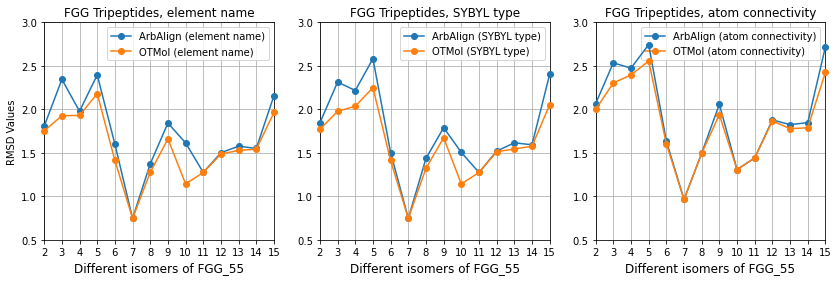

In [10]:
arbalign_res = pd.read_csv('./arbalign_output/FGG_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)

 
plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)

plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')

No valid permutation found
1.0
No valid permutation found
1.0


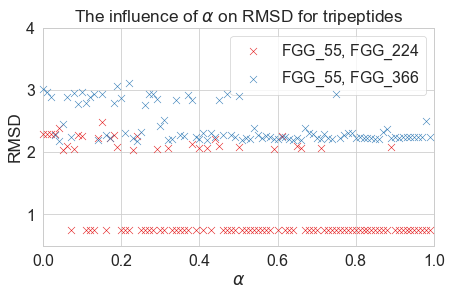

In [16]:
alpha_list = np.linspace(0, 1, 101)
alpha_result0 = alpha_experiment(data_path, '252_FGG55', '258_FGG224', alpha_list=alpha_list)
alpha_result1 = alpha_experiment(data_path, '252_FGG55', '256_FGG366', alpha_list=alpha_list)
# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
sns.set_palette("Set1")

# Create the plot using seaborn
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=alpha_result0,
    x='alpha',
    y='RMSD(OTMol+element name)',
    marker='x',
    s=50,
    label=r'FGG$\_$55, FGG$\_$224',
    clip_on=False,
    zorder=10
)
sns.scatterplot(
    data=alpha_result1,
    x='alpha',
    y='RMSD(OTMol+element name)',
    marker='x',
    s=50,
    label=r'FGG$\_$55, FGG$\_$366',
    clip_on=False,
    zorder=10
)
# Customize the plot
plt.xlim(0, 1)
plt.ylim(0.5, 4)
plt.xlabel(r'$\alpha$')
plt.ylabel('RMSD')
plt.xticks(np.linspace(0, 1, 6))
plt.title(r'The influence of $\alpha$ on RMSD for tripeptides')

# Save the figure
plt.savefig('../images/alpha_FGG_element_name.png', dpi=300, bbox_inches='tight')

No valid permutation found


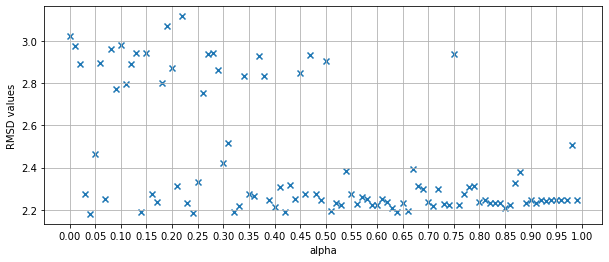

In [5]:
alpha_list = np.linspace(0, 1, 101)
alpha_result = alpha_experiment(data_path, '252_FGG55', '256_FGG366', alpha_list=alpha_list)
plt.figure(figsize=(10,4))
plt.scatter(alpha_result['alpha'], alpha_result['RMSD(OTMol+element name)'], marker='x')
plt.xlabel('alpha')
plt.ylabel('RMSD values')
plt.xticks(np.linspace(0, 1, 21))
plt.grid(True)

In [ ]:
#otmol_name_res = experiment(data_path, molecule_pairs, setup='element name', alpha_list=np.linspace(0,1,101), reflection=False, save=False)
#otmol_type_res = experiment(data_path, molecule_pairs, setup='atom type', alpha_list=np.linspace(0,1,101), reflection=False, save=False)
#otmol_conn_res = experiment(data_path, molecule_pairs, setup='atom connectivity', alpha_list=np.linspace(0,1,101), reflection=False, save=False)

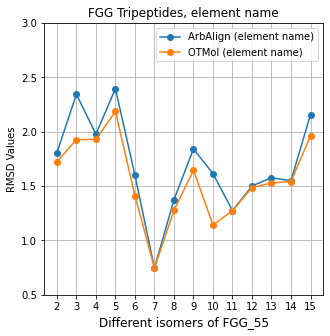

In [ ]:
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_element_name.png', dpi=300, bbox_inches='tight')

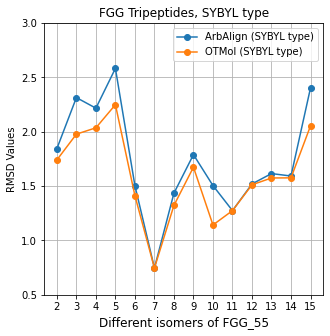

In [ ]:
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_SYBYL_type.png', dpi=300, bbox_inches='tight')

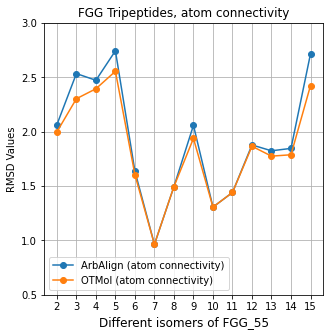

In [ ]:
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_atom_connectivity.png', dpi=300, bbox_inches='tight')

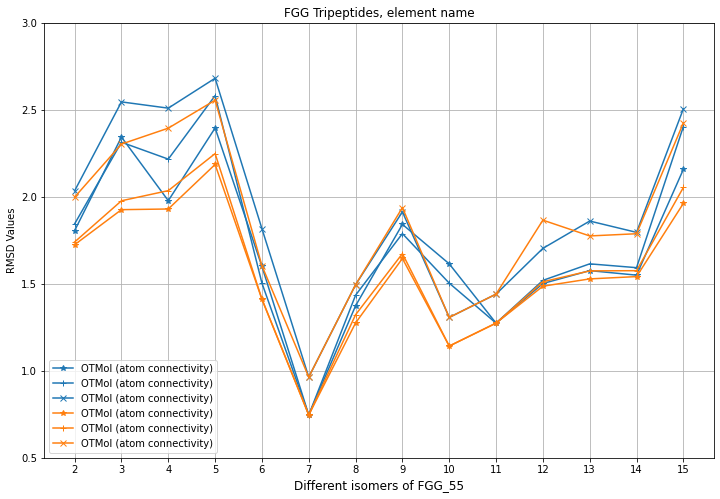

In [ ]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(KM-ByAtomName)': 'ArbAlign (element name)', 
        'RMSD(KM-ByAtomType)': 'ArbAlign (SYBYL type)', 
        'RMSD(KM-byAtomConn)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(12,8))
#for column in columns_to_plot:

plt.plot(range(2,16), combined_df['ArbAlign (element name)'], marker='*', color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['ArbAlign (SYBYL type)'], marker='+',  color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['ArbAlign (atom connectivity)'], marker='x', color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['OTMol (element name)'], marker='*', color='#ff7f0e', label=column)
plt.plot(range(2,16), combined_df['OTMol (SYBYL type)'], marker='+', color='#ff7f0e', label=column)
plt.plot(range(2,16), combined_df['OTMol (atom connectivity)'], marker='x', color='#ff7f0e', label=column)

plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
#plt.savefig('../images/FGG_element_name.png', dpi=300)

In [18]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
print(type(molA))
print(type(molA.OBMol))
X_A, T_A, B_A = otm.tl.process_molecule(molA) # Output (1) spatial coordinates, (2) atom types, and (3) bonds as numpy arrays.
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment = assignment, nameA = 'FGG55', nameB = 'FGG224', save = False)

<class 'openbabel.pybel.Molecule'>
<class 'openbabel.openbabel.OBMol'>
0.7462840440918397


In [9]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_conn_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/253_FGG99.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_conn_res['assignment'][0]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

GW

In [2]:
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')
GW_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )
GW_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )
GW_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )

252_FGG55 253_FGG99 2.65
252_FGG55 254_FGG300 3.28
252_FGG55 255_FGG252 2.58
252_FGG55 256_FGG366 3.73
252_FGG55 257_FGG215 2.06
252_FGG55 258_FGG224 1.50
252_FGG55 259_FGG380 1.92
252_FGG55 260_FGG412 2.32
252_FGG55 261_FGG444 1.82
252_FGG55 262_FGG470 2.42
252_FGG55 263_FGG80 2.92
252_FGG55 264_FGG114 2.66
252_FGG55 265_FGG357 2.35
252_FGG55 266_FGG691 2.73
252_FGG55 253_FGG99 2.03
252_FGG55 254_FGG300 3.35
252_FGG55 255_FGG252 2.60
252_FGG55 256_FGG366 3.68
252_FGG55 257_FGG215 1.51
252_FGG55 258_FGG224 1.21
252_FGG55 259_FGG380 1.68
252_FGG55 260_FGG412 2.09
252_FGG55 261_FGG444 1.46
252_FGG55 262_FGG470 2.40
252_FGG55 263_FGG80 2.31
252_FGG55 264_FGG114 2.28
252_FGG55 265_FGG357 2.07
252_FGG55 266_FGG691 2.75
252_FGG55 253_FGG99 2.15
252_FGG55 254_FGG300 2.83
252_FGG55 255_FGG252 3.57
252_FGG55 256_FGG366 2.75
252_FGG55 257_FGG215 1.63
252_FGG55 258_FGG224 1.89
252_FGG55 259_FGG380 2.33
252_FGG55 260_FGG412 1.99
252_FGG55 261_FGG444 1.31
252_FGG55 262_FGG470 1.79
252_FGG55 263_FGG

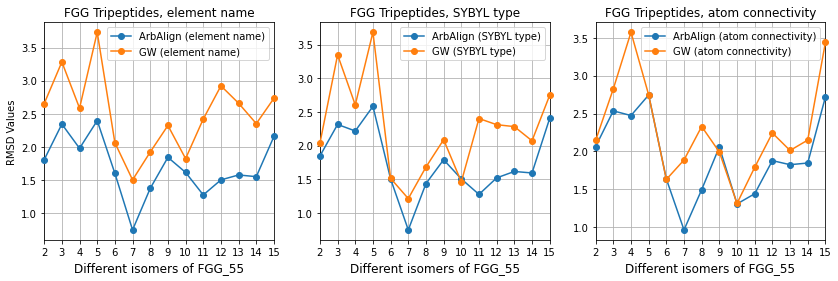

In [3]:
arbalign_res = pd.read_csv('./arbalign_output/FGG_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    GW_name_res.rename(columns={'RMSD(GW+element name)': 'GW (element name)'}), 
    GW_type_res.rename(columns={'RMSD(GW+atom type)': 'GW (SYBYL type)'}), 
    GW_conn_res.rename(columns={'RMSD(GW+atom connectivity)': 'GW (atom connectivity)'}
    ), 
    ], axis=1)

 
plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "GW (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "GW (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "GW (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)

#plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')